In [1]:
%matplotlib notebook

from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

from matplotlib.patches import Circle
from sklearn import svm

import matplotlib.pyplot as plt
import numpy as np

In [2]:
N = 200
D = 2
X = np.zeros([N, D])
y = np.zeros(N)
mus = np.array([[-1.5, -2.5], [3., 2]])
cov = np.array([[2., -1.5], [-1.5, 2.]])
np.random.seed(0)
                
X[:N/2] = np.random.multivariate_normal(mus[0], cov, N/2)
X[N/2:] = np.random.multivariate_normal(mus[1], cov, N/2)
y[:N/2] = 1
y[N/2:] = -1

<IPython.core.display.Javascript object>


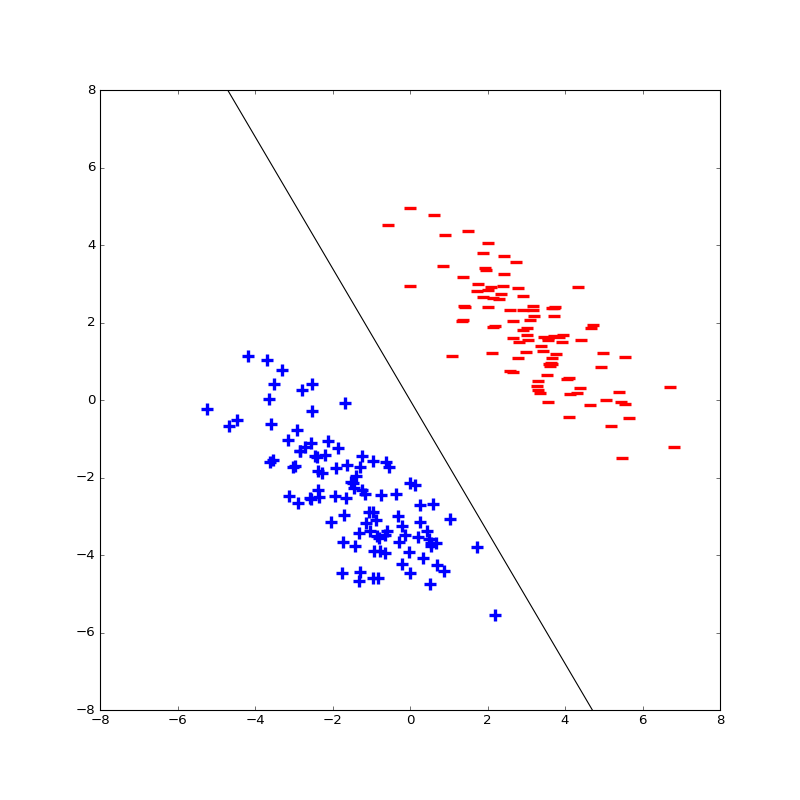

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')

xmin, xmax = -8, 8
ymin, ymax = -8, 8
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
slopes=[-1.7]
colors=['k']
#slopes=[-0.5, -1, -2]
#colors = ['m', 'k', 'g']

ax.plot(X[:N/2, 0], X[:N/2, 1], ls='', c='b', marker='+', markeredgewidth=3, markersize=10)
ax.plot(X[N/2:, 0], X[N/2:, 1], ls='', c='r', marker='_', markeredgewidth=3, markersize=10)

for s, c in zip(slopes, colors):
    ax.plot([xmin, xmax], [s *  xmin, s * xmax], c=c)

<IPython.core.display.Javascript object>


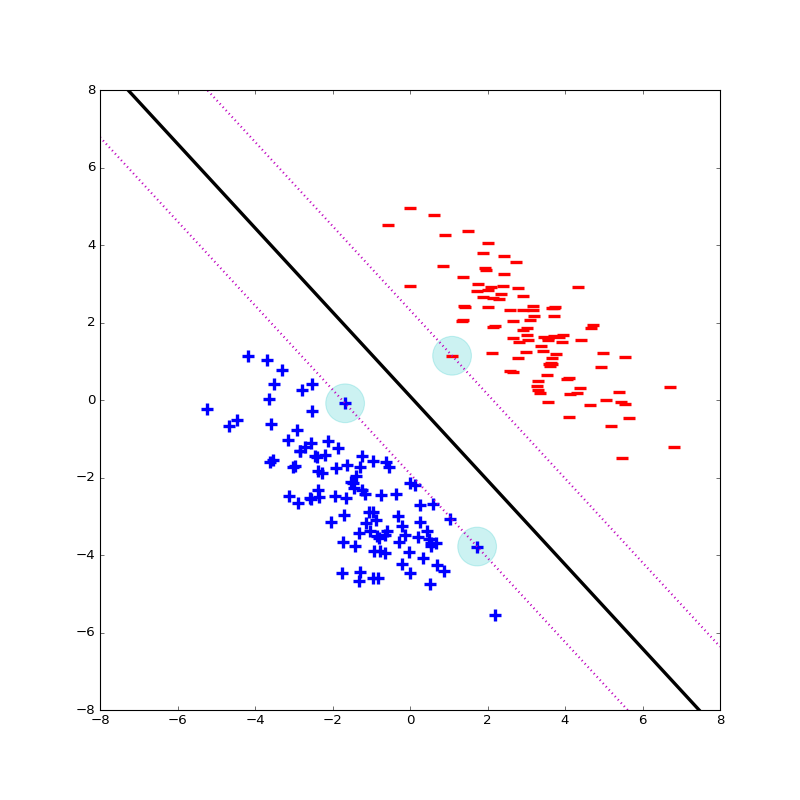

In [4]:
# Run SVM
clf = svm.SVC(C=1e12, kernel='linear')
clf.fit(X, y)

def get_line_eqn(slope, (x, y)):
    """
    Returns equation of the form y = ax + b (returns a, b)
    The line has slope=slope and passes through the point (x, y)
    """
    return slope, y - slope * x


svm_slope = -clf.coef_[0, 0]/clf.coef_[0, 1]
svm_intercept = clf.intercept_
a1, b1 = get_line_eqn(svm_slope, (X[1, 0], X[1, 1]))
a2, b2 = get_line_eqn(svm_slope, (X[135, 0], X[135, 1]))
support_line_1 = [xmin * a1 + b1, xmax * a1 + b1]
support_line_2 = [xmin * a2 + b2, xmax * a2 + b2]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.plot(X[:N/2, 0], X[:N/2, 1], ls='', c='b', marker='+', markeredgewidth=3, markersize=10)
ax.plot(X[N/2:, 0], X[N/2:, 1], ls='', c='r', marker='_', markeredgewidth=3, markersize=10)

ax.plot([xmin, xmax], support_line_1, ls=':', lw=2, c='m')
ax.plot([xmin, xmax], support_line_2, ls=':', lw=2, c='m')
ax.plot([xmin, xmax], [xmin * svm_slope + svm_intercept, xmax * svm_slope + svm_intercept], lw=3, c='k')

for pt in clf.support_vectors_:
    ax.add_patch(Circle((pt[0], pt[1]), 0.5, color='c', alpha=0.2))

In [5]:
# Unseparable Data

np.random.seed(0)
N = 200
D = 20
X = np.zeros([N, D])
X = np.random.randn(N, D) * 6
y = np.zeros(N)
yhat = 3 * X[:, 0] + 2 * X[:, 1] + 1
for i in xrange(N):
    if np.random.random() > 0.2:
        y[i] = np.sign(yhat[i])
    else:
        y[i] = -np.sign(yhat[i])
Xpos = y > 0
Xneg = y < 0

<IPython.core.display.Javascript object>


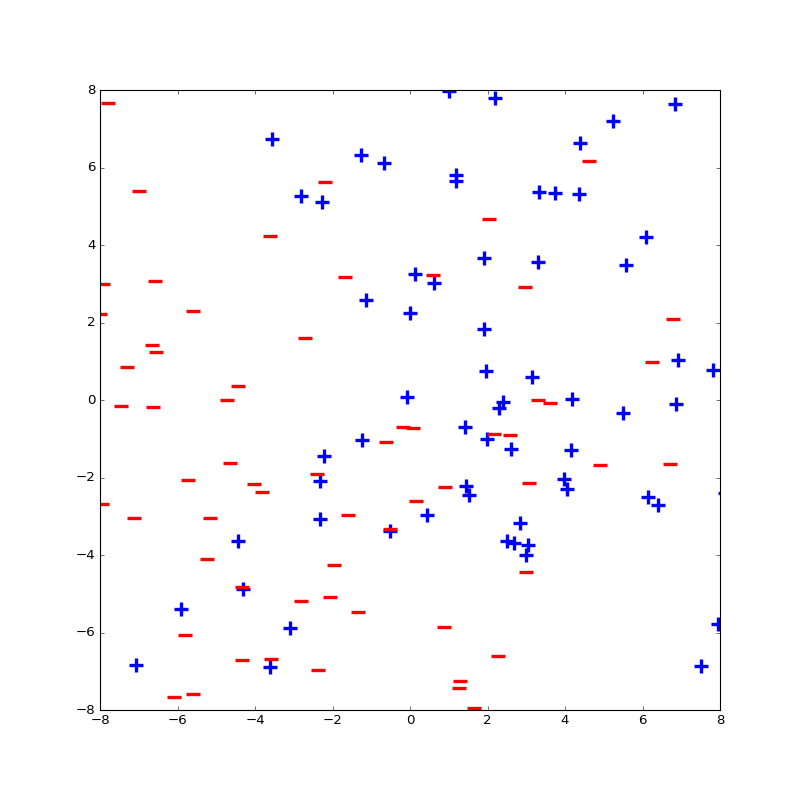

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')
ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)

ax.plot(X[Xpos, 0], X[Xpos, 1], ls='', marker='+', markeredgewidth=3, markersize=12, c='b')
ax.plot(X[Xneg, 0], X[Xneg, 1], ls='', marker='_', markeredgewidth=3, markersize=12, c='r')
